In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import proplot as pplt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

from gcgnn.model_data import load_networkx_data
from gcgnn.plot import adjust_saturation, hex_to_rgba, adjacent_values

import matplotlib.pyplot as plt

COLORS = []
colors = pplt.Cycle("ggplot")
for color in colors:
    COLORS.append(color["color"])
colors = pplt.Cycle("default")
for color in colors:
    COLORS.append(color["color"])

pplt.rc["figure.facecolor"] = "white"

DATA_DIR="/scratch/gpfs/sj0161/delta_pattern/"
PLOT_DIR="/home/sj0161/gcgnn/fig/"

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

### Load data

In [32]:
%%time
graph, topo, desc, meta, mode, rg_mean, rg_std = load_networkx_data(DATA_DIR)

pat = {40: [], 90: [], 190: []}

for dop in [40, 90, 190]:
    for G in graph[dop]:
        temp = np.unique([G.nodes[node]["type"] for node in G.nodes])
        if len(temp) == 1 and temp[0] == 0:
            pat[dop].append(0)
        elif len(temp) == 1 and temp[0] == 1:
            pat[dop].append(1)
        elif len(temp) == 2:
            pat[dop].append(2)

CPU times: user 5.94 s, sys: 509 ms, total: 6.45 s
Wall time: 6.57 s


### Different architectures

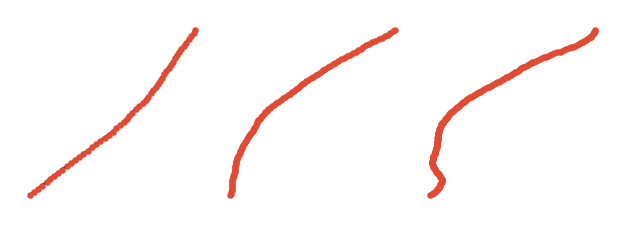

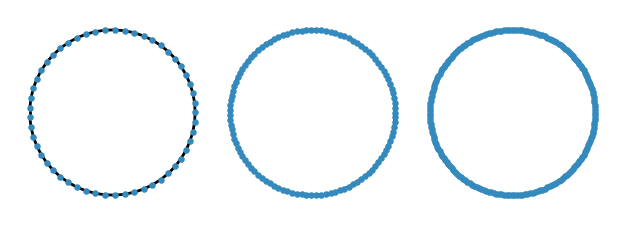

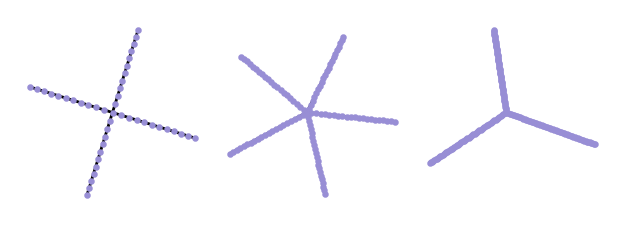

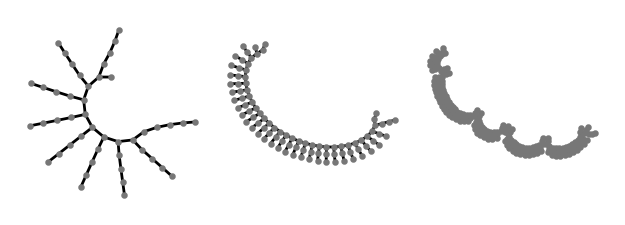

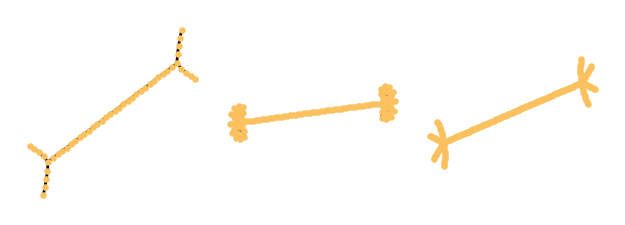

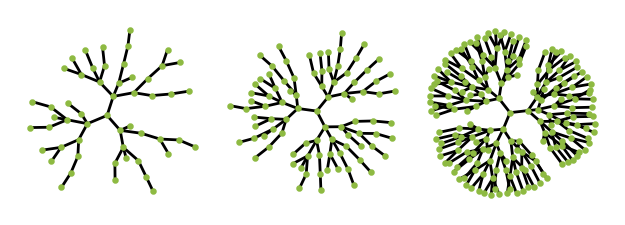

In [18]:
topo_unique = ['linear', 'cyclic', 'star', 'comb', 'branch', 'dendrimer']


for u in topo_unique:
    
    fig, ax = pplt.subplots(ncols=3, nrows=1, refheight=1, refwidth=1, space=0)
    
    
    s = 3
    c = np.where(np.array(topo_unique) == u)[0][0]
    dp = [40, 90, 190]

    for i in range(3):
        idx = np.where(topo[dp[i]] == u)[0]
        G   = graph[dp[i]][idx[i]]
        pos = nx.kamada_kawai_layout(G)
        
        if u == "linear" and dp in [90, 190]:
            pos = nx.spring_layout(G, pos=pos, iterations=5000)
            nx.draw(G, pos=pos, node_color=COLORS[c], node_size=s, ax=ax[i])
        else:
            nx.draw(G, pos=pos, node_color=COLORS[c], node_size=s, ax=ax[i])
    
    output = os.path.join(PLOT_DIR, f"graph_topo_{u}.svg")
    fig.save(output, dpi=300)

### Different chemical patterns

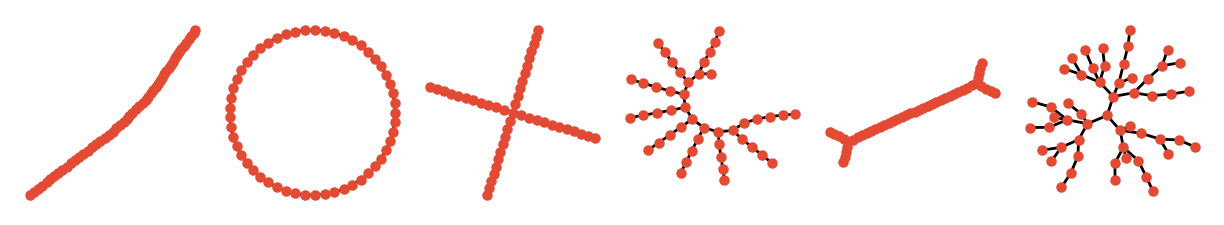

In [19]:
fig, ax = pplt.subplots(ncols=6, nrows=1, refheight=1, refwidth=1, space=0)

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

for i, u in enumerate(topo_unique):
    s = 10
    idx = np.where(topo[40] == u)[0][0]
    G = graph[40][idx]
    pos = nx.kamada_kawai_layout(G)
    colors = COLORS[0]
    nx.draw(G, pos=pos, node_color=colors, node_size=s, ax=ax[i])

output = os.path.join(PLOT_DIR, "graph_pattern_homo_red.svg")
fig.save(output, dpi=300)

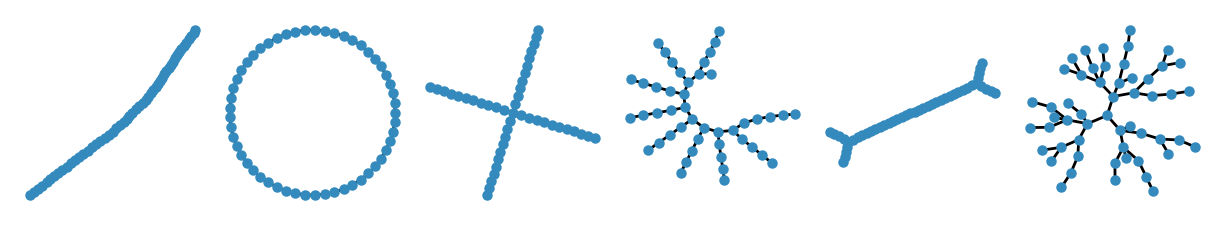

In [20]:
fig, ax = pplt.subplots(ncols=6, nrows=1, refheight=1, refwidth=1, space=0)

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

for i, u in enumerate(topo_unique):
    s = 10
    idx = np.where(topo[40] == u)[0][0]
    G = graph[40][idx]
    pos = nx.kamada_kawai_layout(G)
    colors = COLORS[1]
    nx.draw(G, pos=pos, node_color=colors, node_size=s, ax=ax[i])

output = os.path.join(PLOT_DIR, "graph_pattern_homo_blue.svg")
fig.save(output, dpi=300)

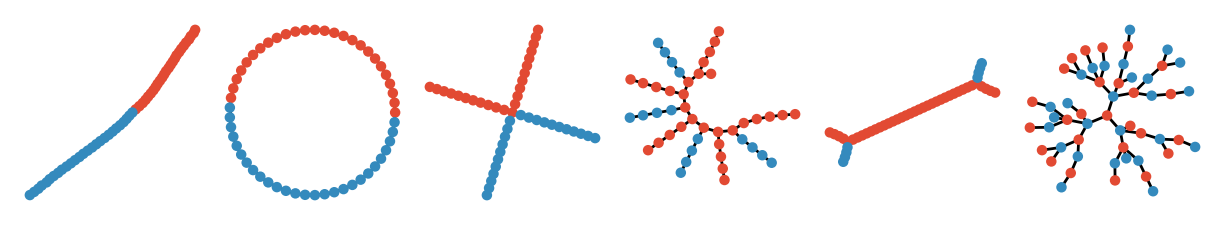

In [21]:
fig, ax = pplt.subplots(ncols=6, nrows=1, refheight=1, refwidth=1, space=0)

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

for i, u in enumerate(topo_unique):
    s = 10
    idx = np.where(topo[40] == u)[0][0]
    idx2 = np.where((np.array(desc[40]) == desc[40][idx]) & (np.array(topo[40]) == topo[40][idx]))[0]
    
    if i == 2:
        pat = "04"
    else:
        pat = "00"
    
    idx3 = np.where(np.array(mode[40])[idx2] == pat)[0][0]
    idx4 = idx2[idx3]
    
    G = graph[40][idx4]
    pos = nx.kamada_kawai_layout(G)
    
    colors = [hex_to_rgba(COLORS[k]) for k in nx.get_node_attributes(G, "type").values()]
    
    nx.draw(G, pos=pos, node_color=colors, node_size=s, ax=ax[i])

output = os.path.join(PLOT_DIR, f"graph_pattern_regular.svg")
fig.save(output, dpi=300)

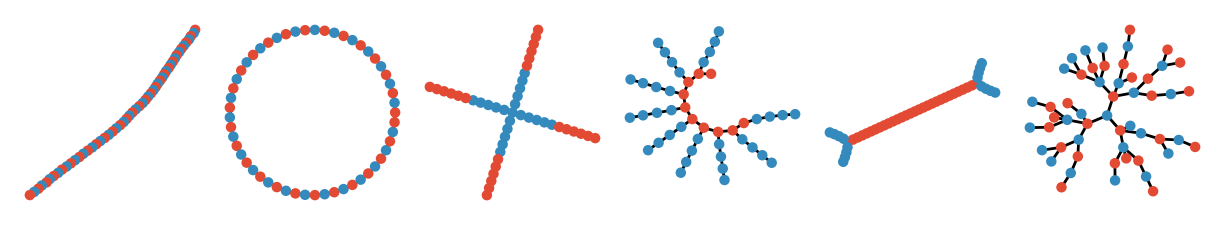

In [22]:
fig, ax = pplt.subplots(ncols=6, nrows=1, refheight=1, refwidth=1, space=0)

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

for i, u in enumerate(topo_unique):
    s = 10
    idx = np.where(topo[40] == u)[0][0]
    idx2 = np.where((np.array(desc[40]) == desc[40][idx]) & (np.array(topo[40]) == topo[40][idx]))[0]
    
    if i == 2:
        pat = "06"
    else:
        pat = "01"
    
    idx3 = np.where(np.array(mode[40])[idx2] == pat)[0][0]
    idx4 = idx2[idx3]
    
    G = graph[40][idx4]
    pos = nx.kamada_kawai_layout(G)
    
    colors = [hex_to_rgba(COLORS[k]) for k in nx.get_node_attributes(G, "type").values()]
    
    nx.draw(G, pos=pos, node_color=colors, node_size=s, ax=ax[i])

output = os.path.join(PLOT_DIR, f"graph_pattern_regular_v2.svg")
fig.save(output, dpi=300)

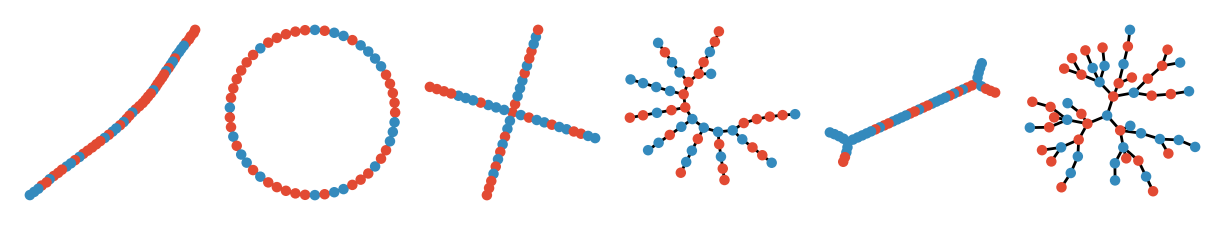

In [23]:
fig, ax = pplt.subplots(ncols=6, nrows=1, refheight=1, refwidth=1, space=0)

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

for i, u in enumerate(topo_unique):
    s = 10
    idx = np.where(topo[40] == u)[0][0]
    idx2 = np.where((np.array(desc[40]) == desc[40][idx]) & (np.array(topo[40]) == topo[40][idx]))[0]
    
    if i == 2:
        pat = "23"
    else:
        pat = "22"
    
    idx3 = np.where(np.array(mode[40])[idx2] == pat)[0][0]
    idx4 = idx2[idx3]
    
    G = graph[40][idx4]
    pos = nx.kamada_kawai_layout(G)
    
    colors = [hex_to_rgba(COLORS[k]) for k in nx.get_node_attributes(G, "type").values()]
    
    nx.draw(G, pos=pos, node_color=colors, node_size=s, ax=ax[i])

output = os.path.join(PLOT_DIR, f"graph_pattern_random.svg")
fig.save(output, dpi=300)

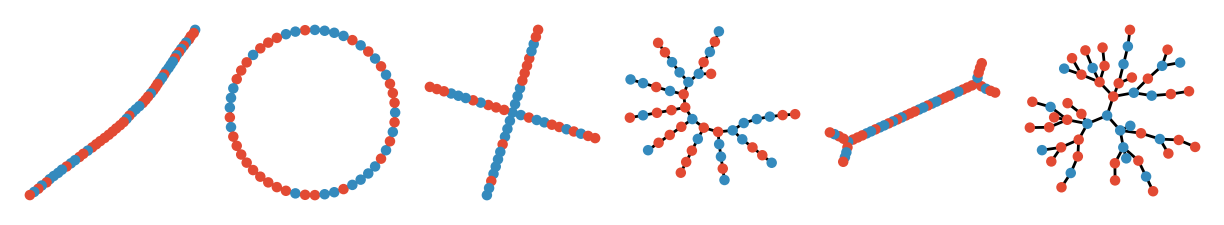

In [24]:
fig, ax = pplt.subplots(ncols=6, nrows=1, refheight=1, refwidth=1, space=0)

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

for i, u in enumerate(topo_unique):
    s = 10
    idx = np.where(topo[40] == u)[0][0]
    idx2 = np.where((np.array(desc[40]) == desc[40][idx]) & (np.array(topo[40]) == topo[40][idx]))[0]
    
    if i == 2:
        pat = "20"
    else:
        pat = "20"
    
    idx3 = np.where(np.array(mode[40])[idx2] == pat)[0][0]
    idx4 = idx2[idx3]
    
    G = graph[40][idx4]
    pos = nx.kamada_kawai_layout(G)
    
    colors = [hex_to_rgba(COLORS[k]) for k in nx.get_node_attributes(G, "type").values()]
    
    nx.draw(G, pos=pos, node_color=colors, node_size=s, ax=ax[i])

output = os.path.join(PLOT_DIR, "graph_pattern_random_v2.svg")
fig.save(output, dpi=300)

### Rg2 mean and std distribution across architectures

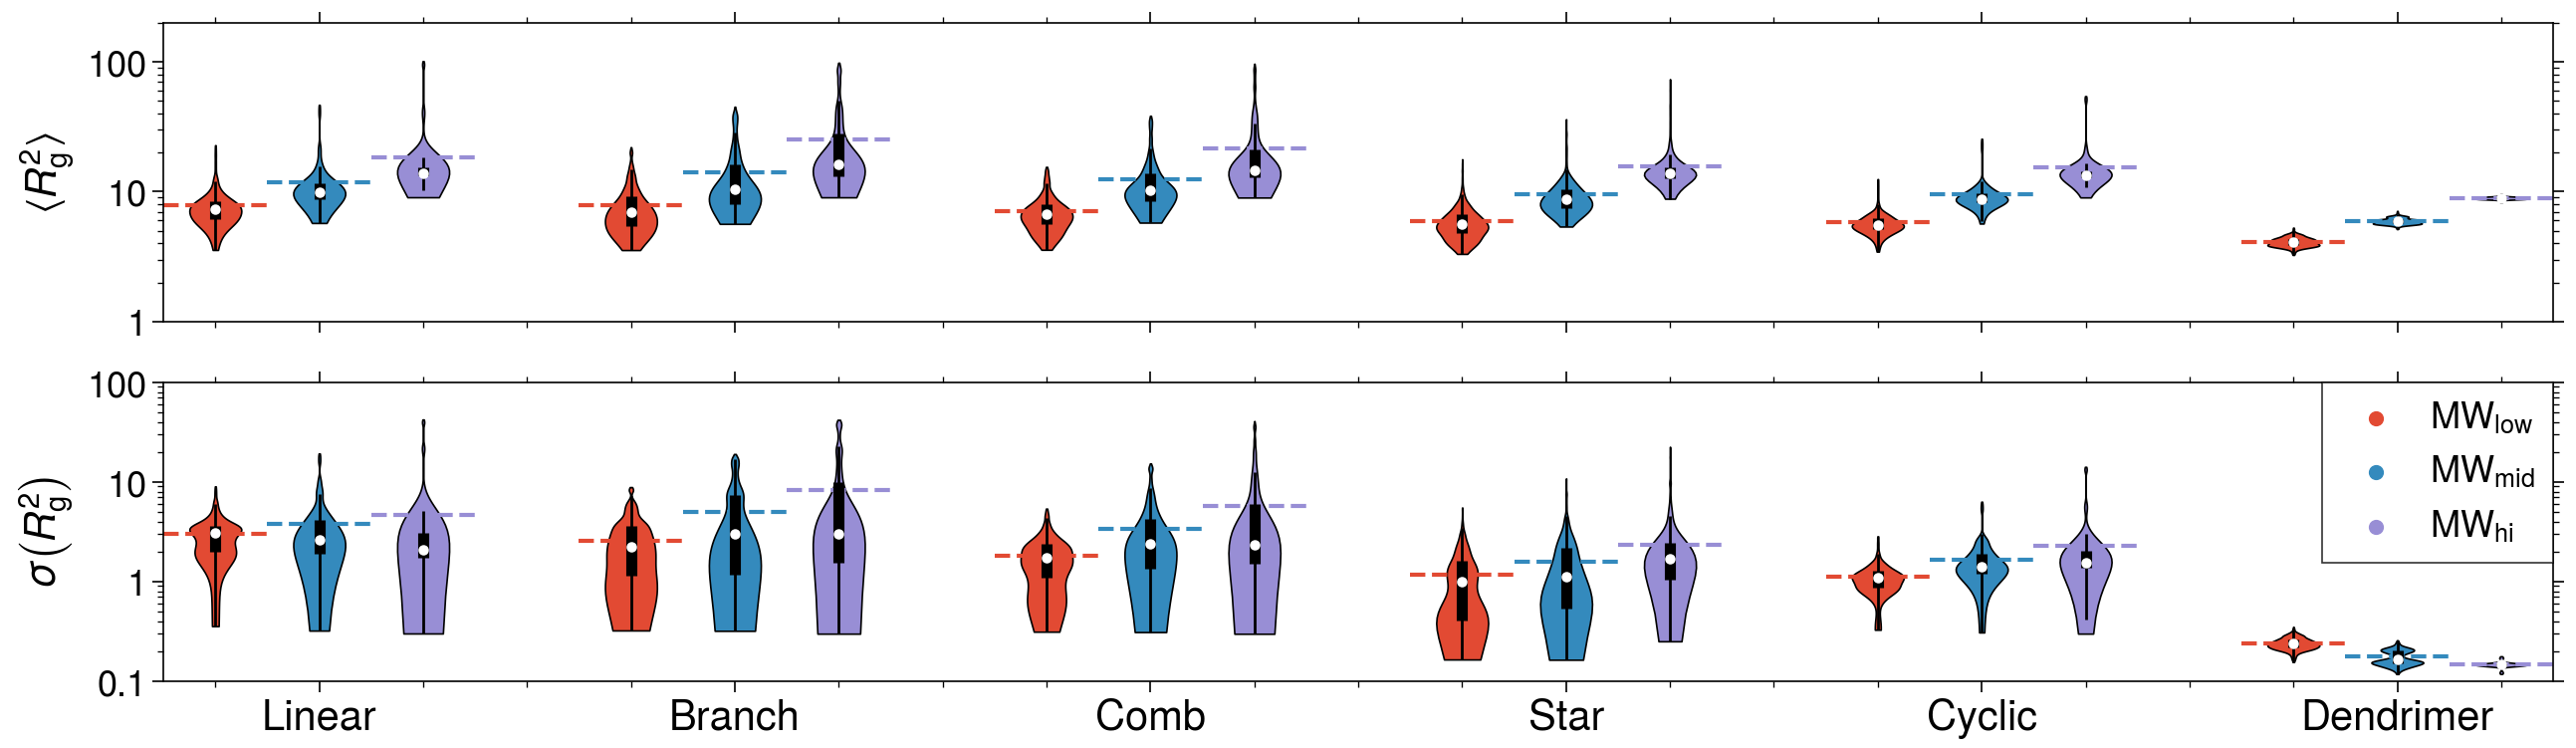

In [8]:
from gcgnn.plot import plot_rg_dist

plot_rg_dist(PLOT_DIR, COLORS, topo, rg_mean, rg_std)

### SI: Mean vs std Rg

In [13]:
%%time
graph, topo, desc, meta, mode, rg_mean, rg_std = load_networkx_data(DATA_DIR)

pat = {40: [], 90: [], 190: []}

for dop in [40, 90, 190]:
    for G in graph[dop]:
        temp = np.unique([G.nodes[node]["type"] for node in G.nodes])
        if len(temp) == 1 and temp[0] == 0:
            pat[dop].append(0)
        elif len(temp) == 1 and temp[0] == 1:
            pat[dop].append(1)
        elif len(temp) == 2:
            pat[dop].append(2)

CPU times: user 4.55 s, sys: 459 ms, total: 5.01 s
Wall time: 5.04 s


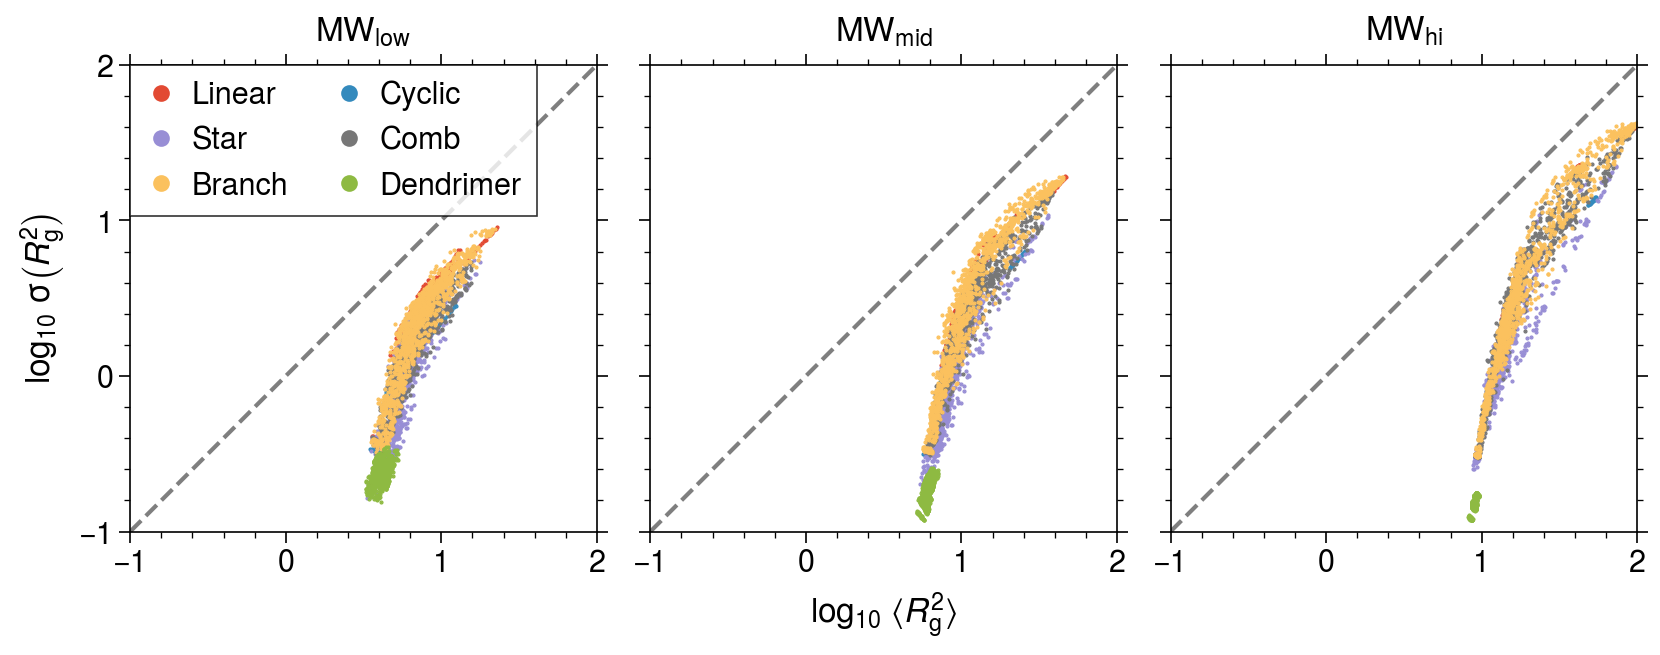

In [7]:
from gcgnn.plot import plot_si_rg_mean_std

plot_si_rg_mean_std(PLOT_DIR, COLORS, topo, topo_unique, rg_mean, rg_std)

### SI: simulated and theoretical Rg

In [10]:
from gcgnn.plot import plot_si_sim_theo

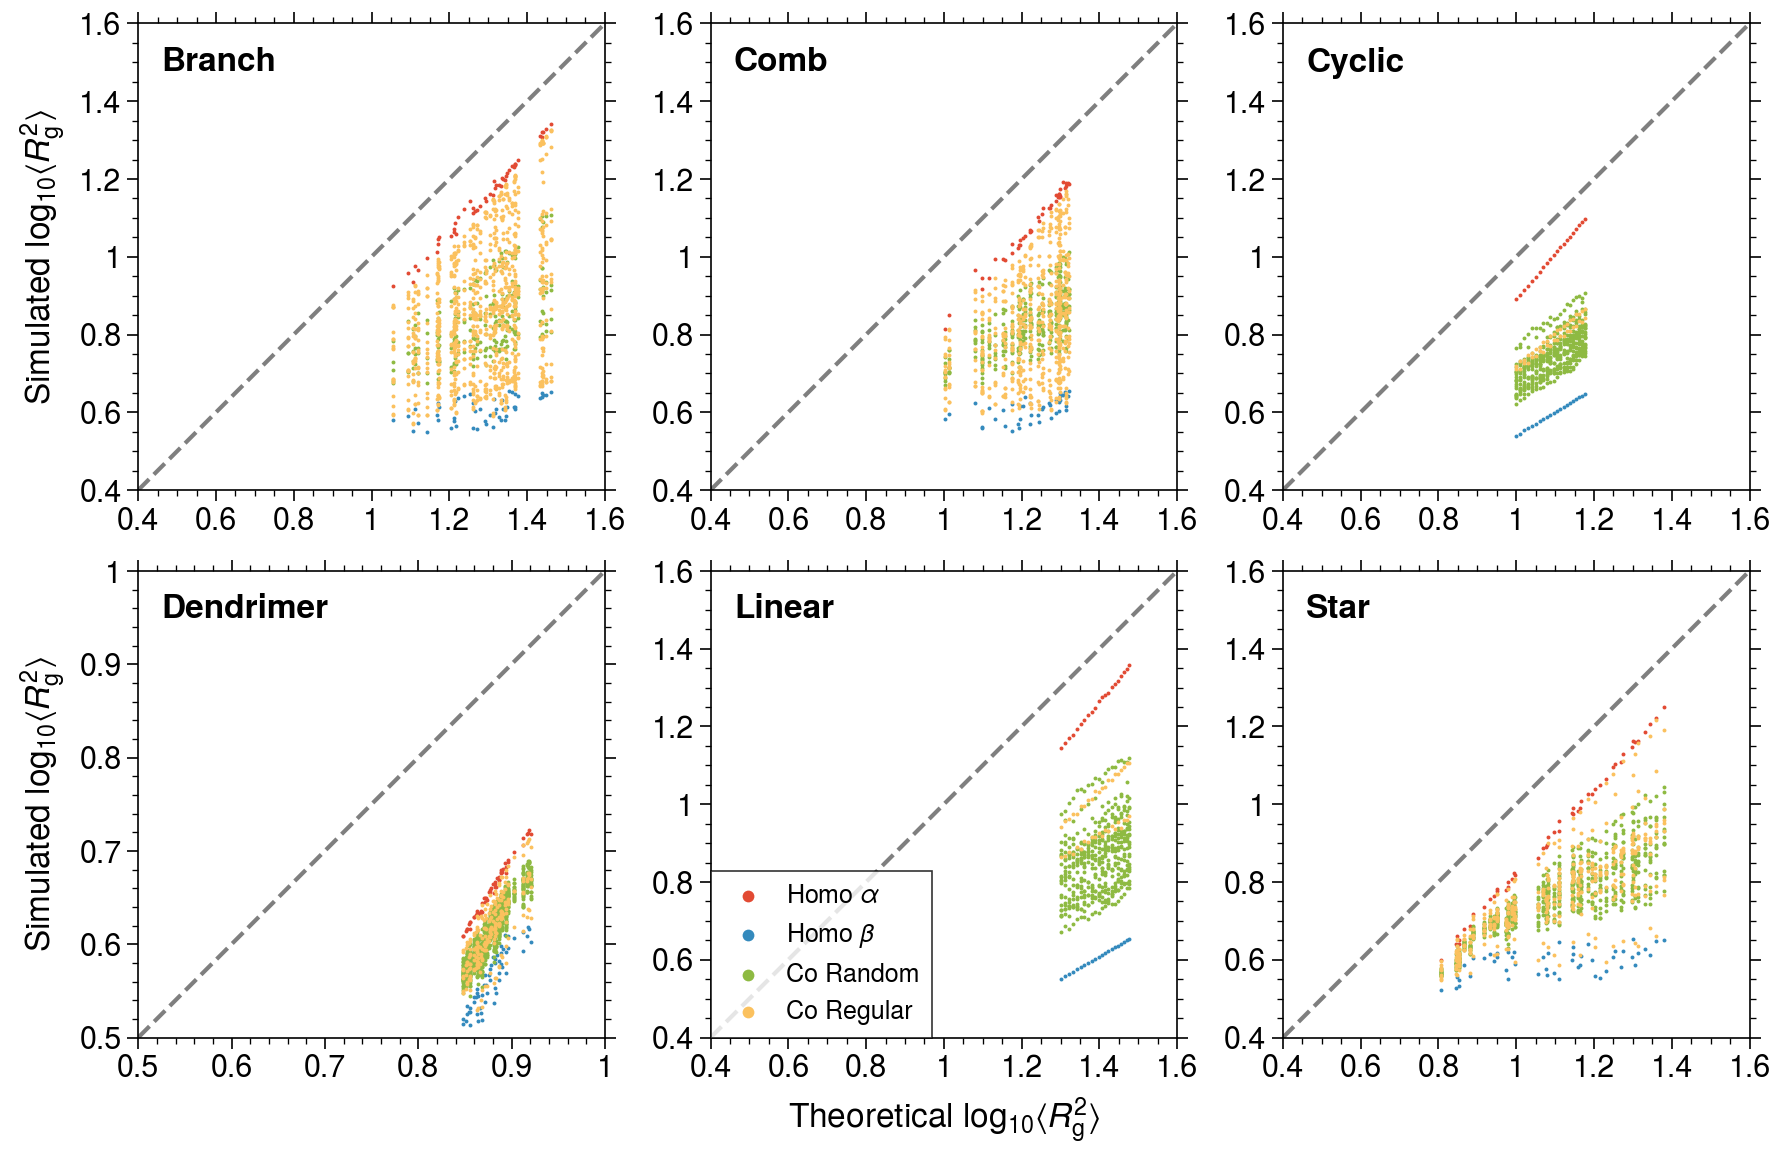

In [14]:
plot_si_sim_theo(
    DATA_DIR,
    PLOT_DIR,
    COLORS,
    topo,
    pat,
    mode,
    rg_mean,
    rg_std,
    dps=40,
    vmin_fix=0.4,
    vmax_fix=1.6,
    task="mean",
)

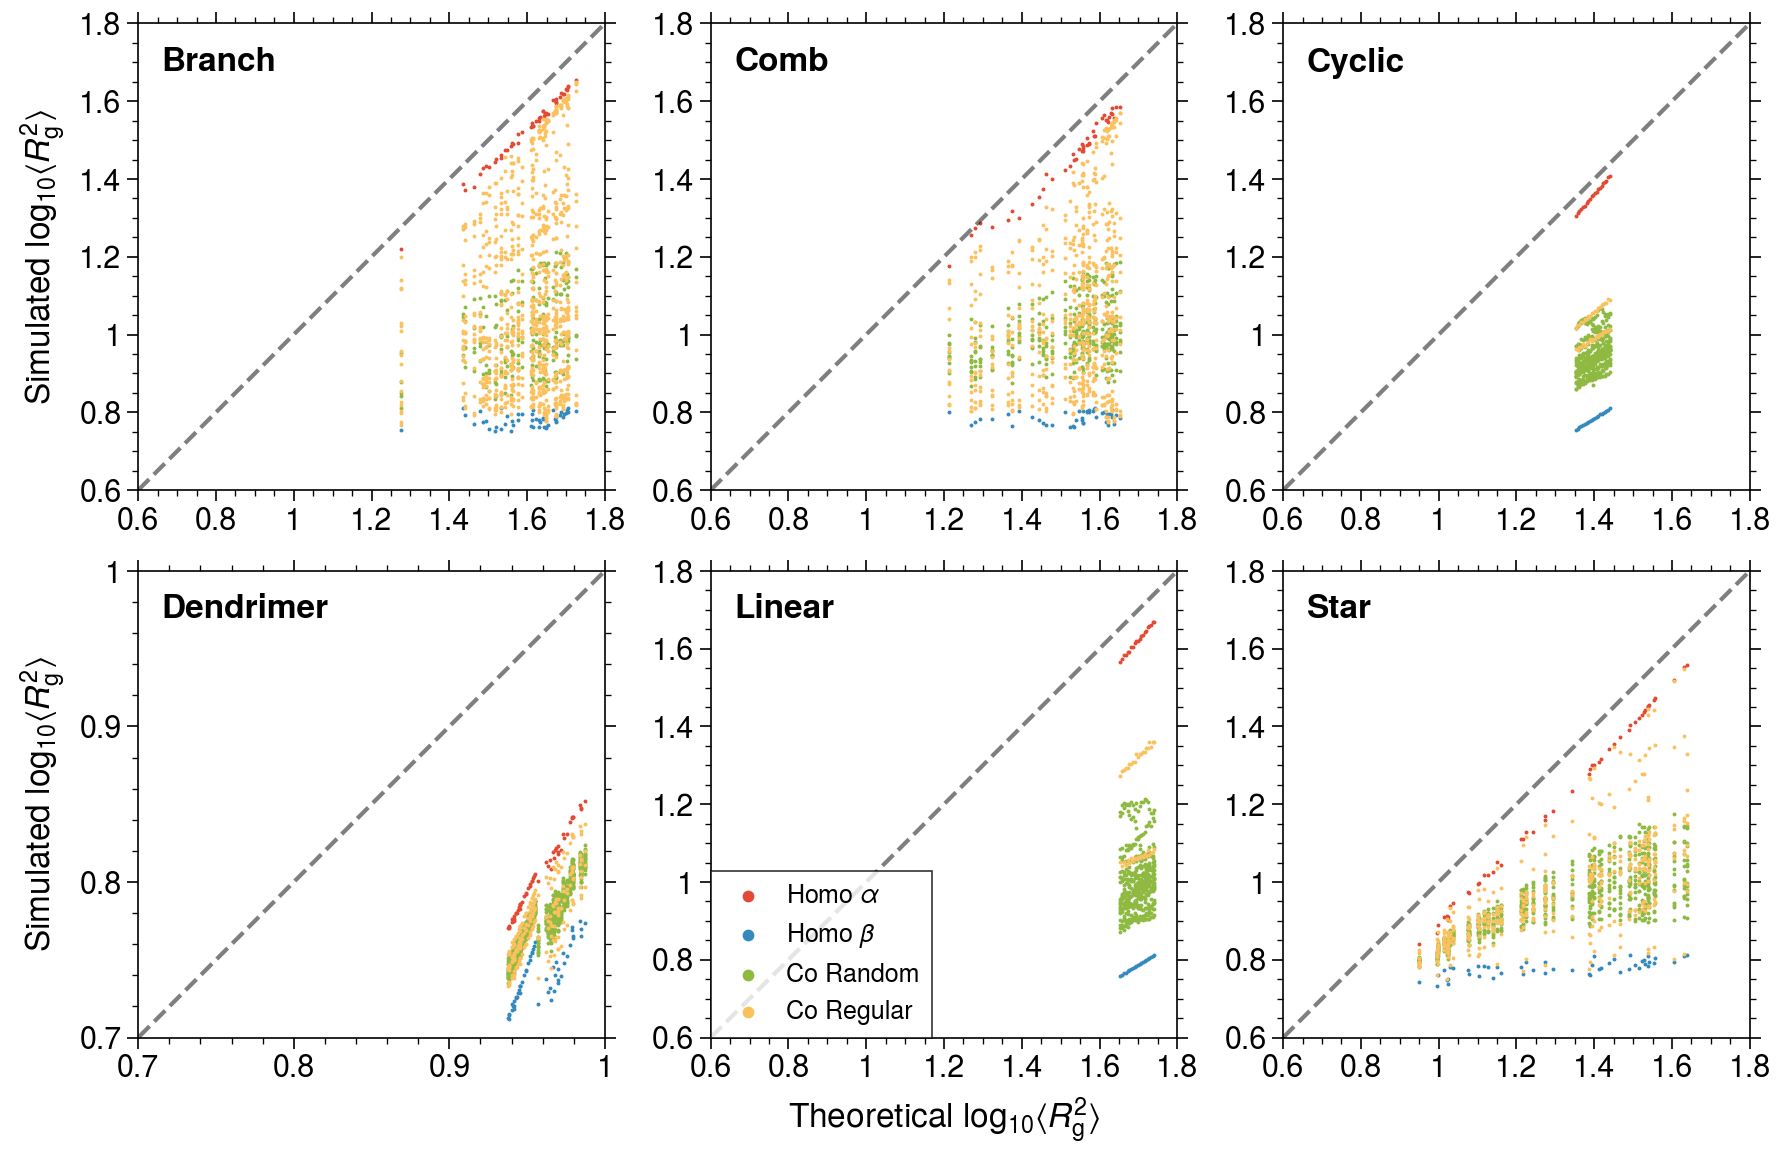

In [15]:
plot_si_sim_theo(
    DATA_DIR,
    PLOT_DIR,
    COLORS,
    topo,
    pat,
    mode,
    rg_mean,
    rg_std,
    dps=90,
    vmin_fix=0.6,
    vmax_fix=1.8,
    task="mean",
)

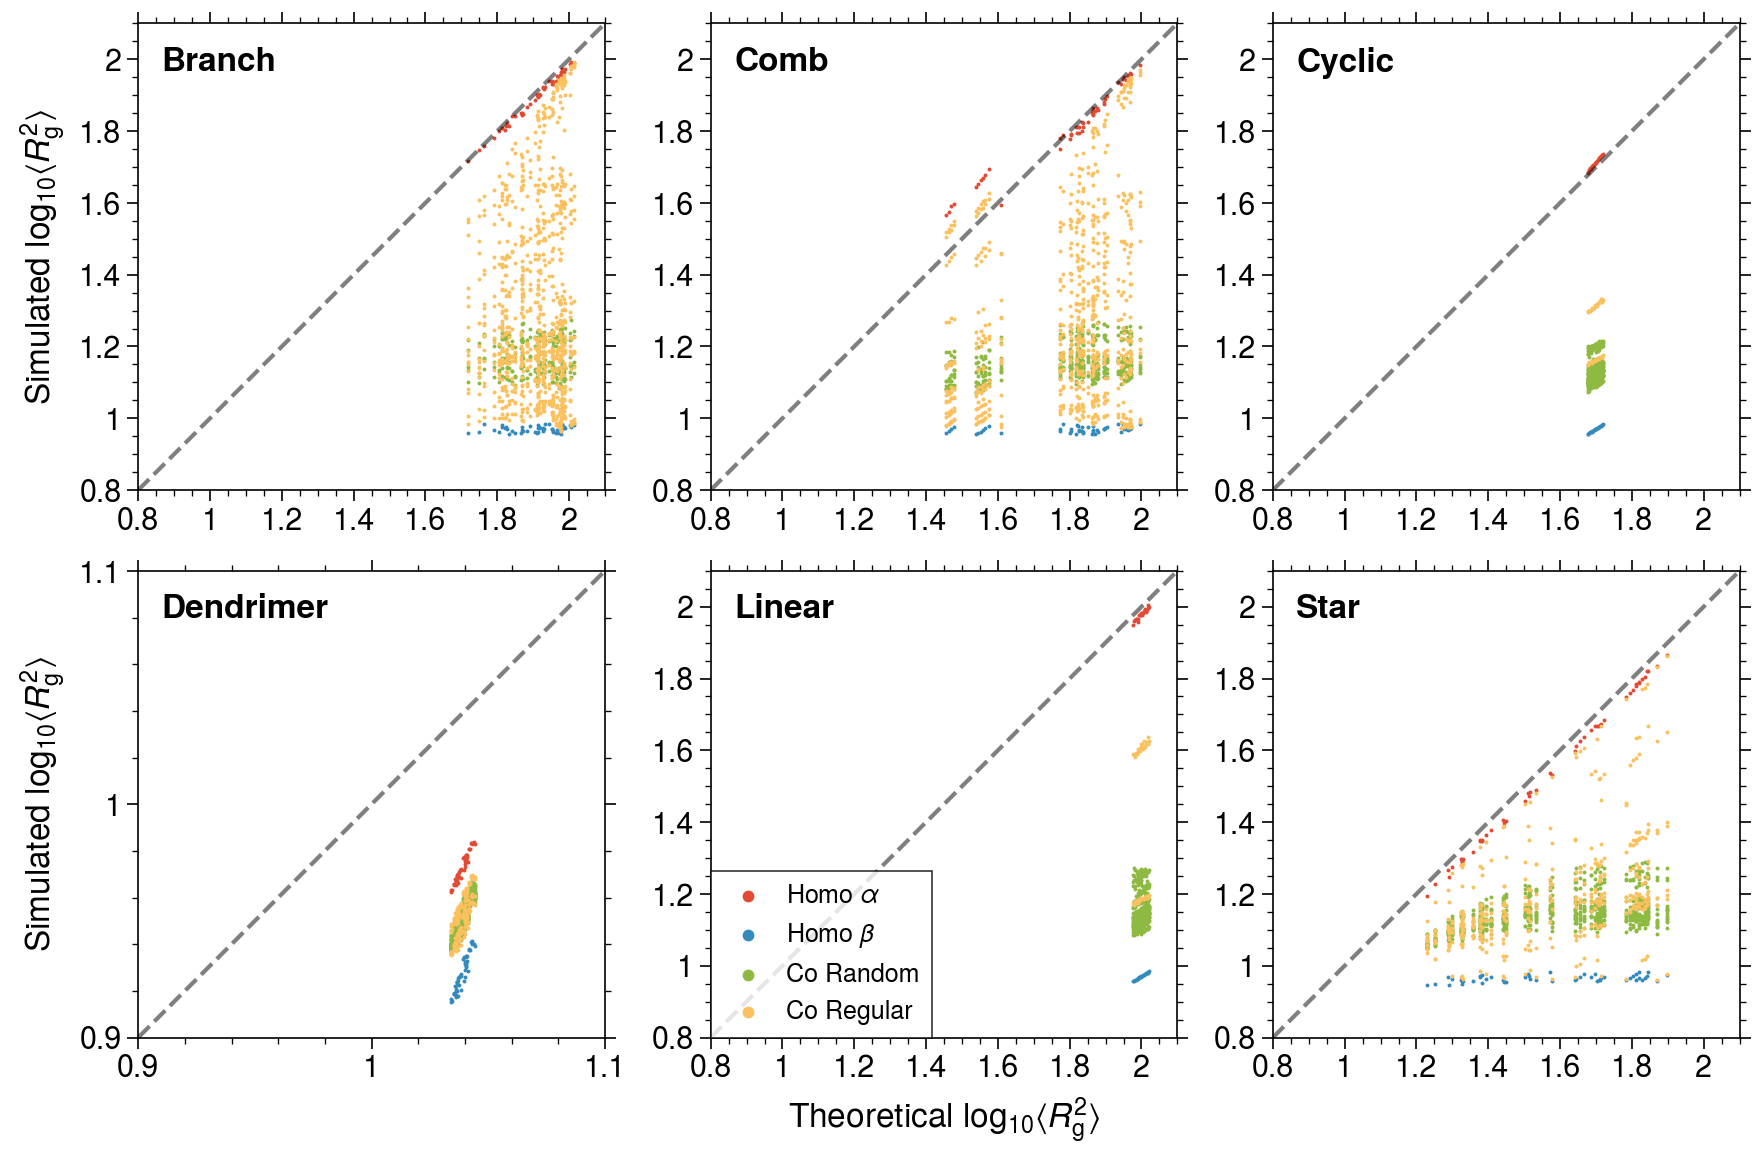

In [16]:
plot_si_sim_theo(
    DATA_DIR,
    PLOT_DIR,
    COLORS,
    topo,
    pat,
    mode,
    rg_mean,
    rg_std,
    dps=190,
    vmin_fix=0.8,
    vmax_fix=2.1,
    task="mean",
)

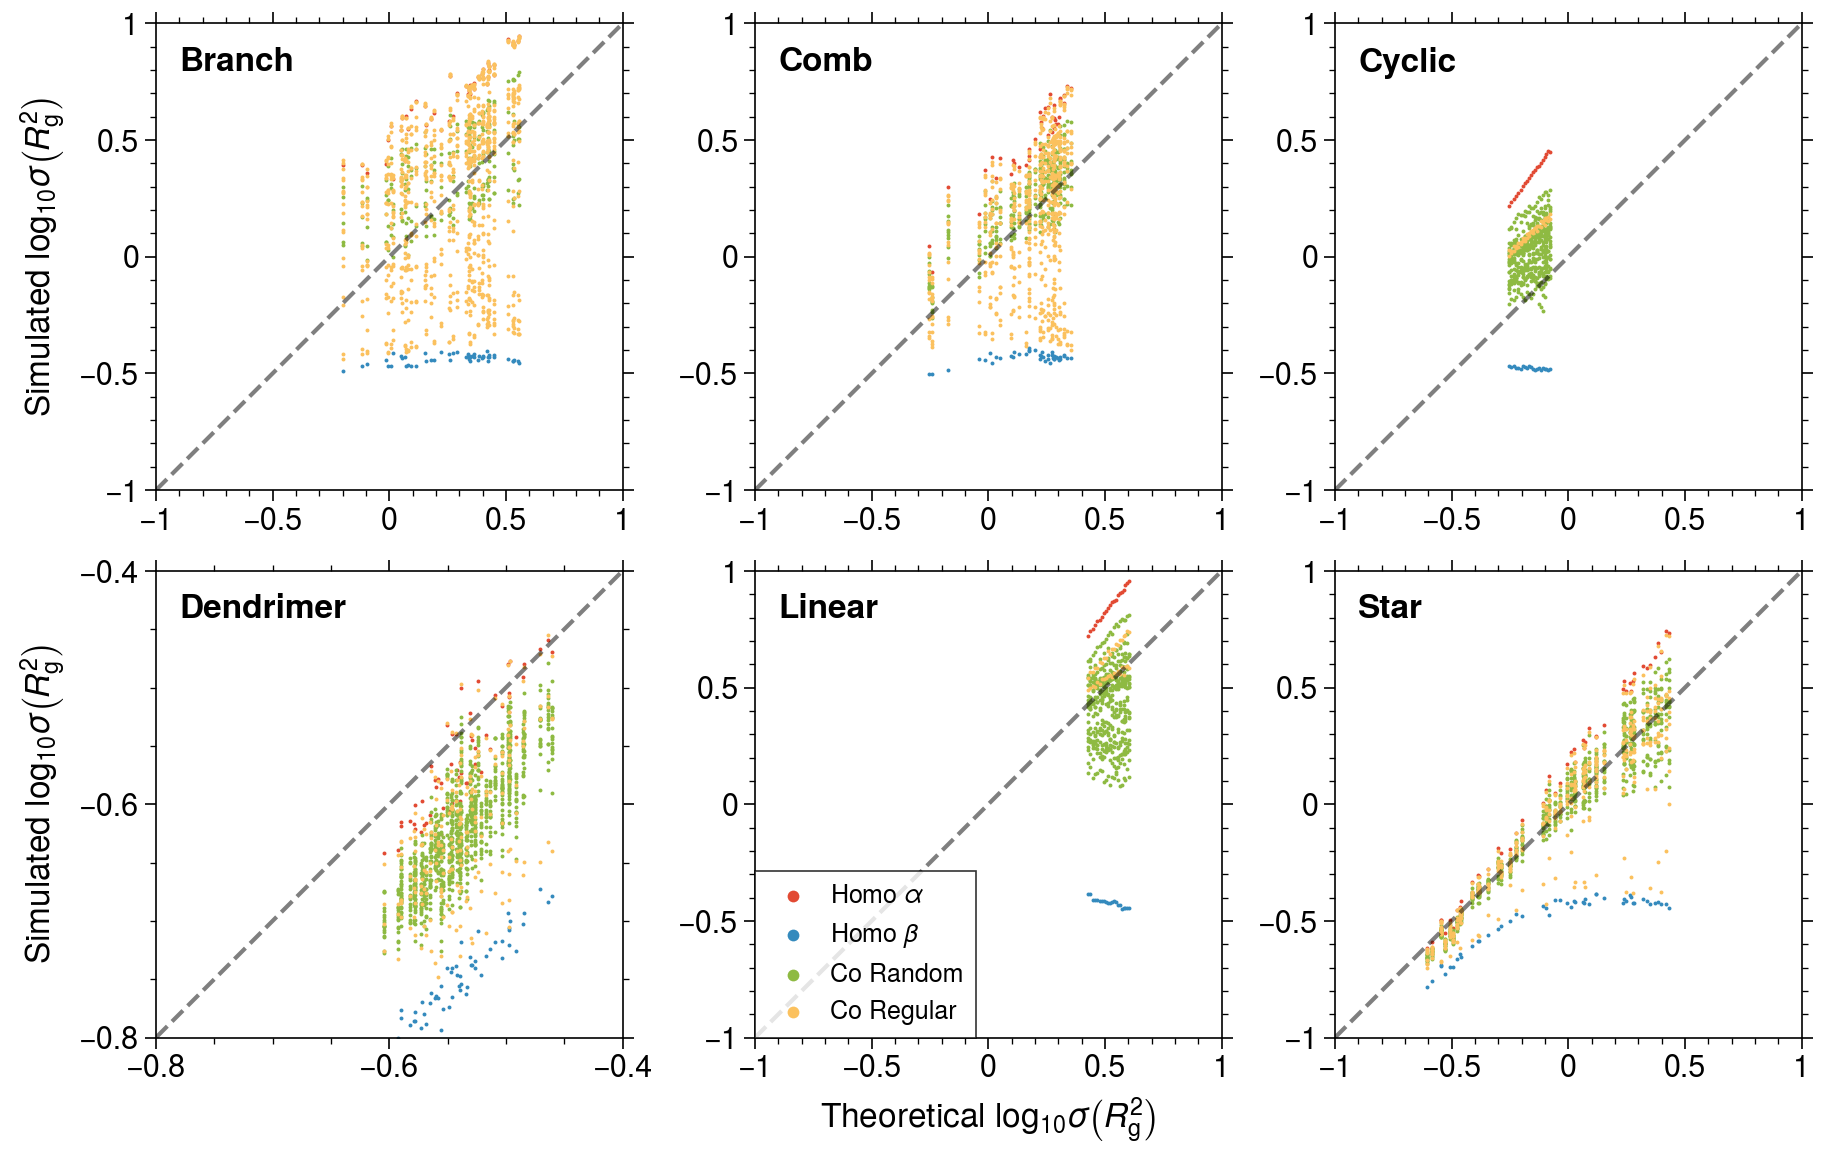

In [18]:
plot_si_sim_theo(
    DATA_DIR,
    PLOT_DIR,
    COLORS,
    topo,
    pat,
    mode,
    rg_mean,
    rg_std,
    dps=40,
    vmin_fix=-1.0,
    vmax_fix=1.0,
    task="std",
)

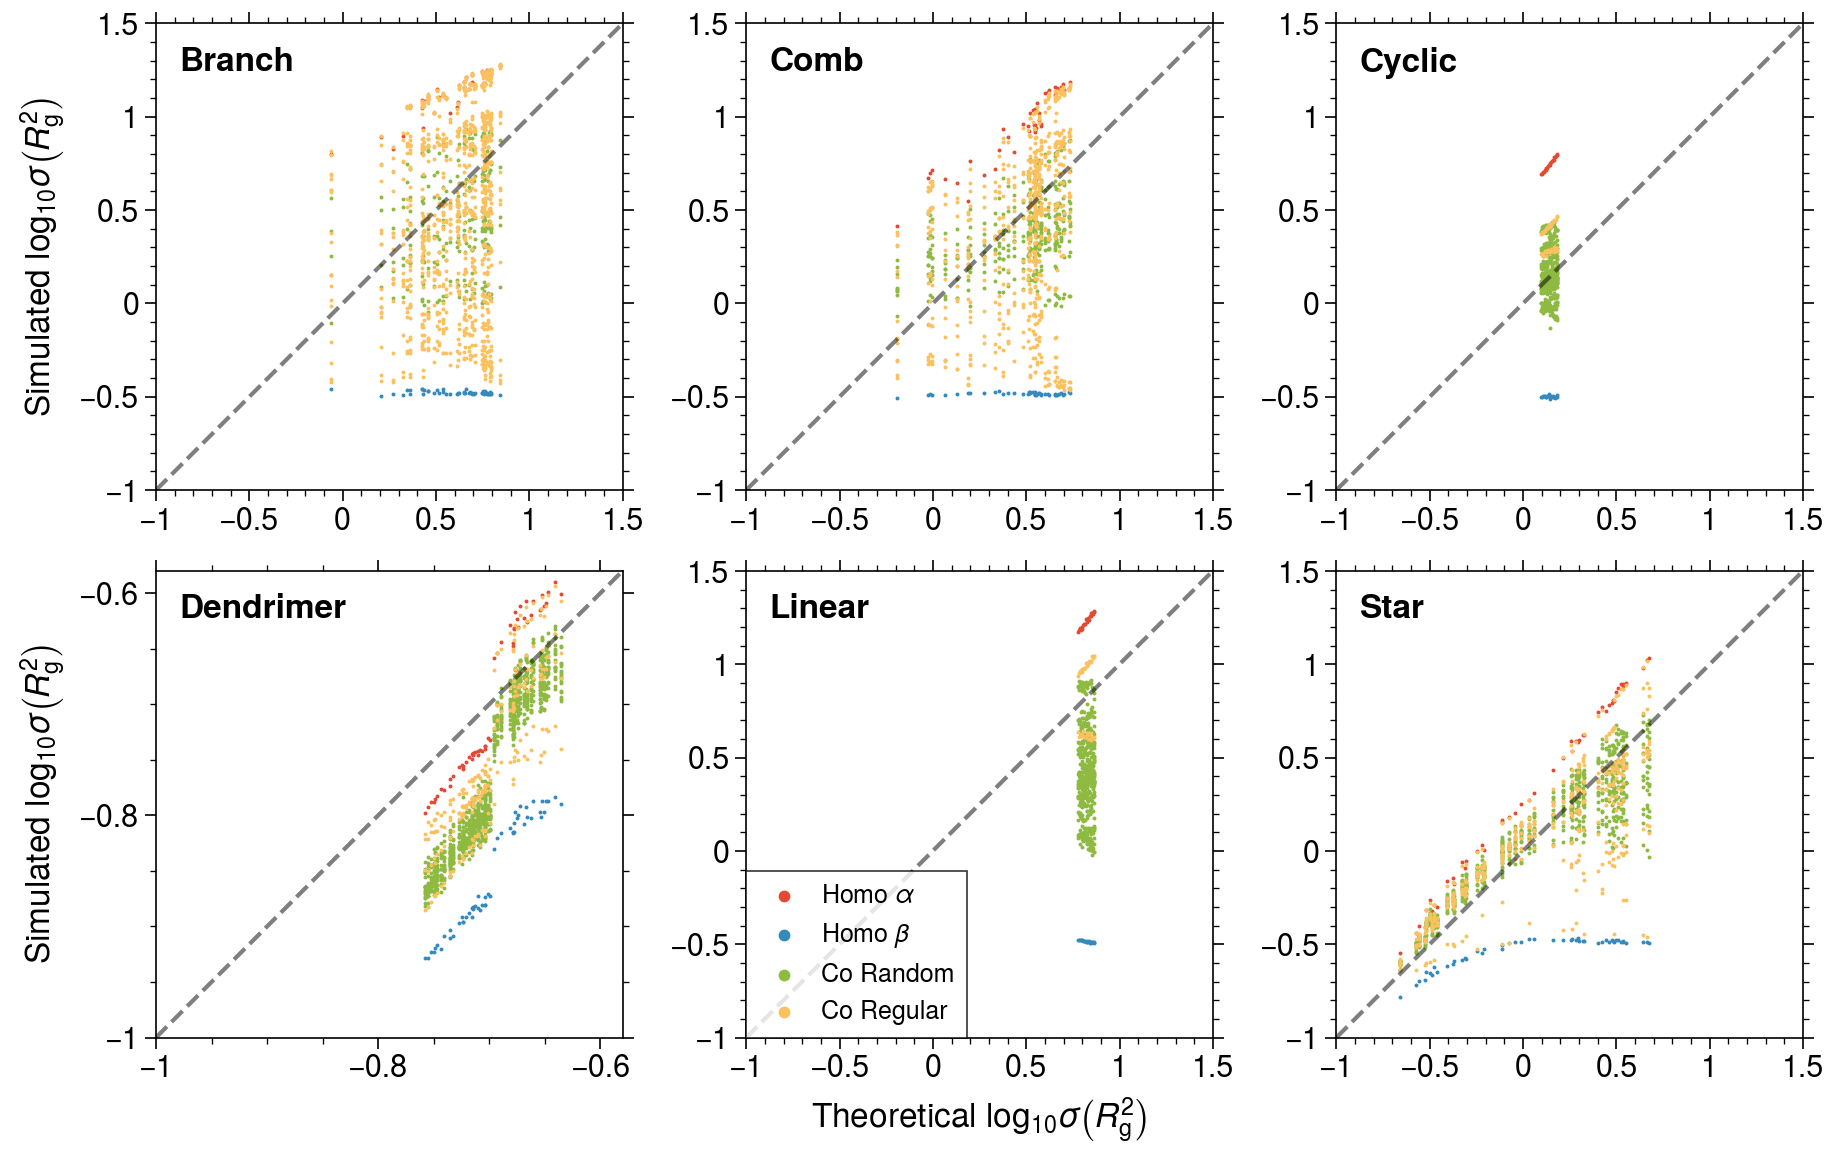

In [19]:
plot_si_sim_theo(
    DATA_DIR,
    PLOT_DIR,
    COLORS,
    topo,
    pat,
    mode,
    rg_mean,
    rg_std,
    dps=90,
    vmin_fix=-1.0,
    vmax_fix=1.5,
    task="std",
)

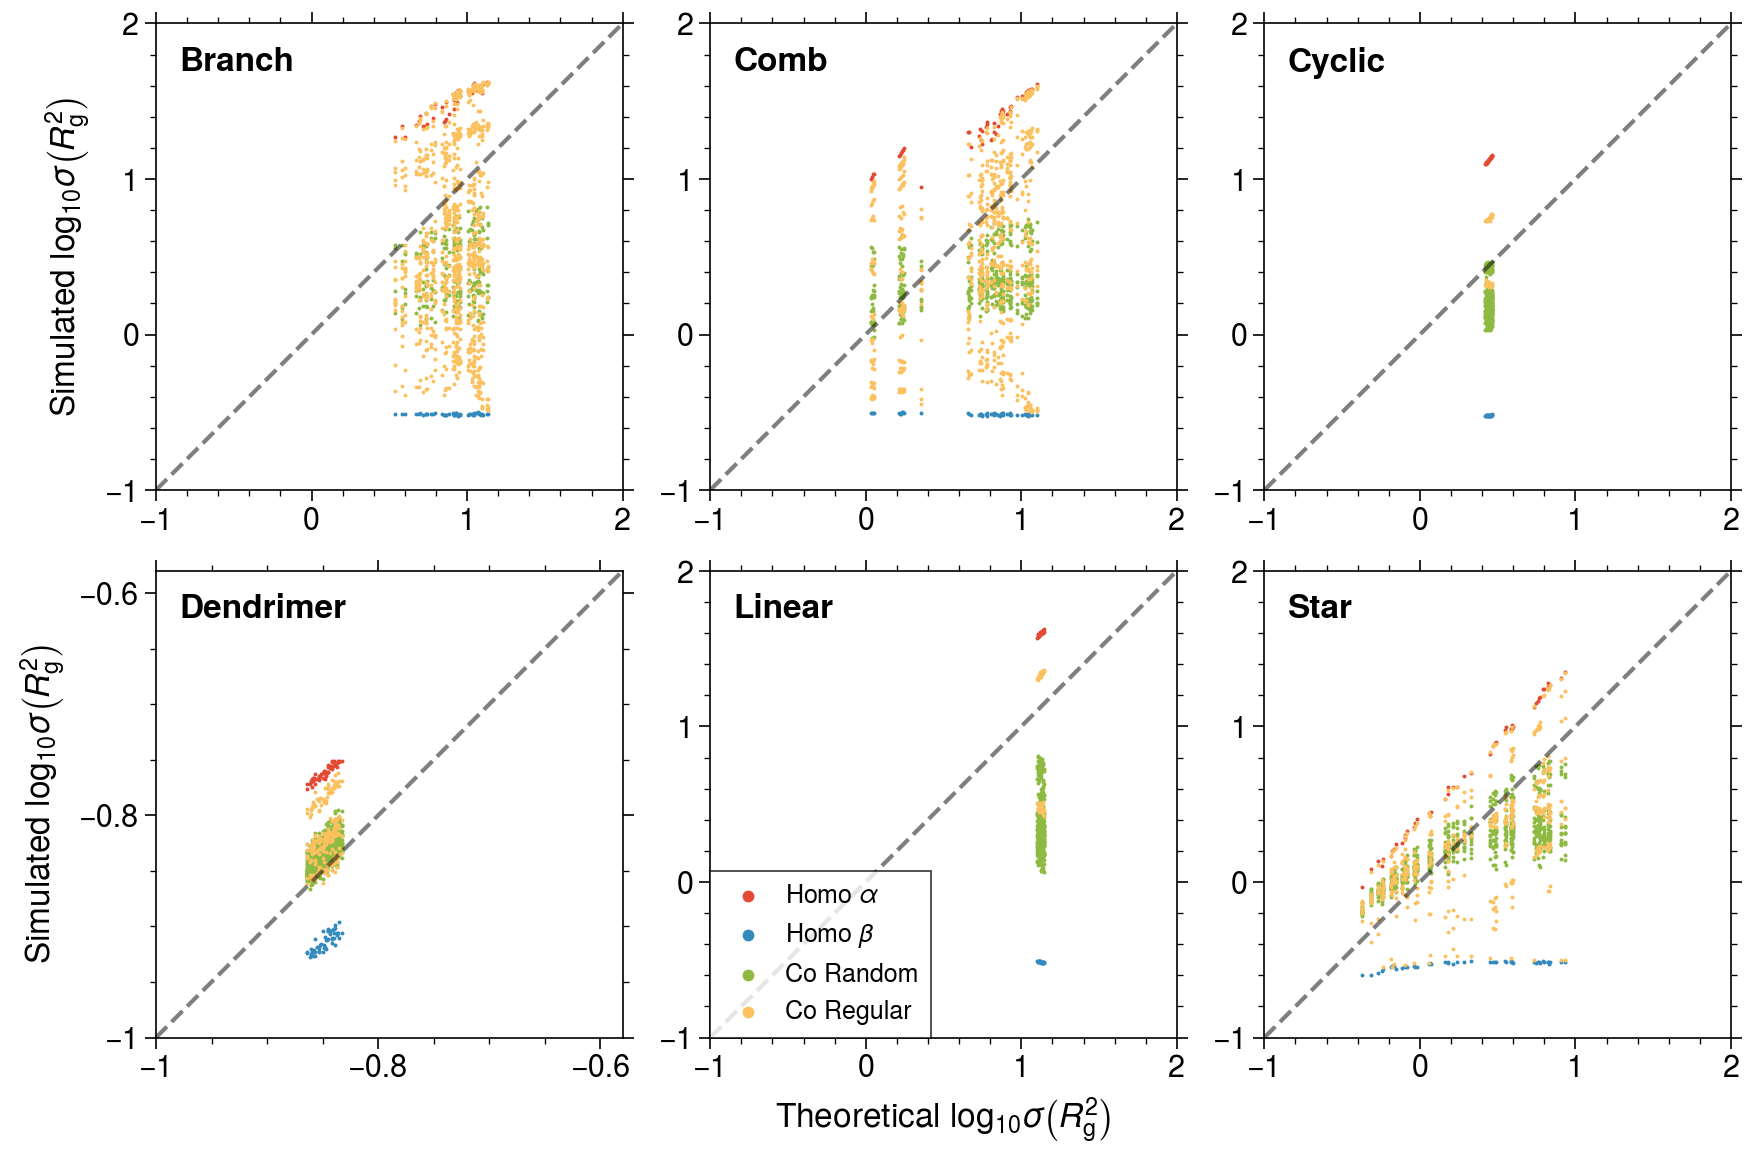

In [20]:
plot_si_sim_theo(
    DATA_DIR,
    PLOT_DIR,
    COLORS,
    topo,
    pat,
    mode,
    rg_mean,
    rg_std,
    dps=190,
    vmin_fix=-1.0,
    vmax_fix=2.0,
    task="std",
)